In [72]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('supermarket_sales_clean.csv')

In [74]:
df.sample(10)

,city,time,product_line,unit_price,quantity,tax_5%,total,payment,customer_type,gender,rating,cogs,gross_income
614,mandalay,2019-07-02 20:24:00,electronic_accessories,79.39,10,39.6950,833.5950,cash,normal,male,6.2,793.90,39.6950
71,yangon,2019-01-27 13:26:00,sports_and_travel,32.25,5,8.0625,169.3125,cash,normal,female,9.0,161.25,8.0625
756,naypyitaw,2019-01-30 16:24:00,food_and_beverages,97.03,5,24.2575,509.4075,ewallet,normal,female,9.3,485.15,24.2575
947,naypyitaw,2019-08-01 19:09:00,food_and_beverages,24.31,3,3.6465,76.5765,credit card,member,male,4.3,72.93,3.6465
124,yangon,2019-02-20 16:49:00,health_and_beauty,32.32,10,16.1600,339.3600,credit card,normal,female,10.0,323.20,16.1600
261,yangon,2019-05-03 16:38:00,electronic_accessories,78.31,3,11.7465,246.6765,ewallet,normal,male,5.4,234.93,11.7465
666,mandalay,2019-12-02 19:43:00,electronic_accessories,39.48,1,1.9740,41.4540,cash,member,female,6.5,39.48,1.9740
860,naypyitaw,2019-03-18 15:52:00,fashion_accessories,51.47,1,2.5735,54.0435,ewallet,member,female,8.5,51.47,2.5735
590,mandalay,2019-05-03 19:40:00,home_and_lifestyle,95.46,8,38.1840,801.8640,ewallet,normal,female,4.7,763.68,38.1840
986,naypyitaw,2019-11-02 16:19:00,fashion_accessories,62.12,10,31.0600,652.2600,cash,normal,male,5.9,621.20,31.0600


In [75]:
df.dtypes

city              object
time              object
product_line      object
unit_price       float64
quantity           int64
tax_5%           float64
total            float64
payment           object
customer_type     object
gender            object
rating           float64
cogs             float64
gross_income     float64
dtype: object

In [76]:
df['time'] = pd.to_datetime(df['time'])

In [77]:
df.select_dtypes(include=['object']).columns

Index(['city', 'product_line', 'payment', 'customer_type', 'gender'], dtype='object')

In [78]:
df.select_dtypes(include=[np.number]).columns

Index(['unit_price', 'quantity', 'tax_5%', 'total', 'rating', 'cogs',
       'gross_income'],
      dtype='object')

## Plotting the Data

In [79]:
sns.set_theme(style='darkgrid')

### Relational Plots

Scatter Plot

<Axes: xlabel='cogs', ylabel='rating'>

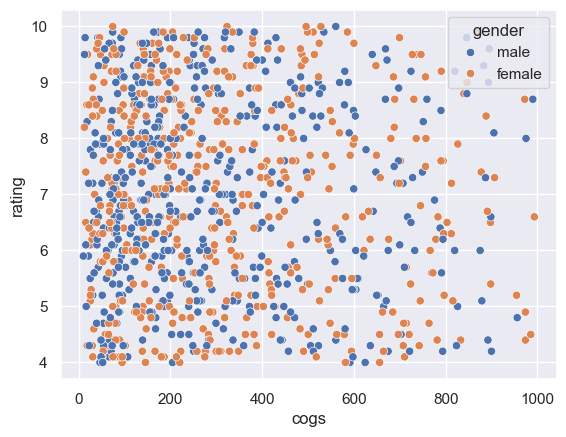

In [80]:
sns.scatterplot(data=df, x='cogs', y='rating',hue='gender')

Line Plot

<Axes: xlabel='time', ylabel='total'>

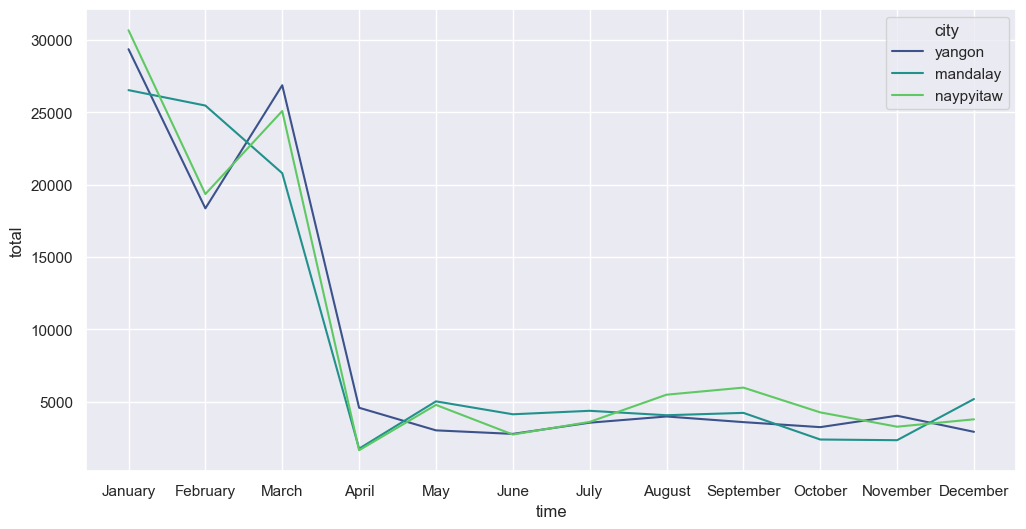

In [81]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['time'].dt.month_name(),y=df['total'],palette='viridis',hue=df['city'],errorbar=None,estimator='sum')

Relational Plot

<Figure size 1200x600 with 0 Axes>

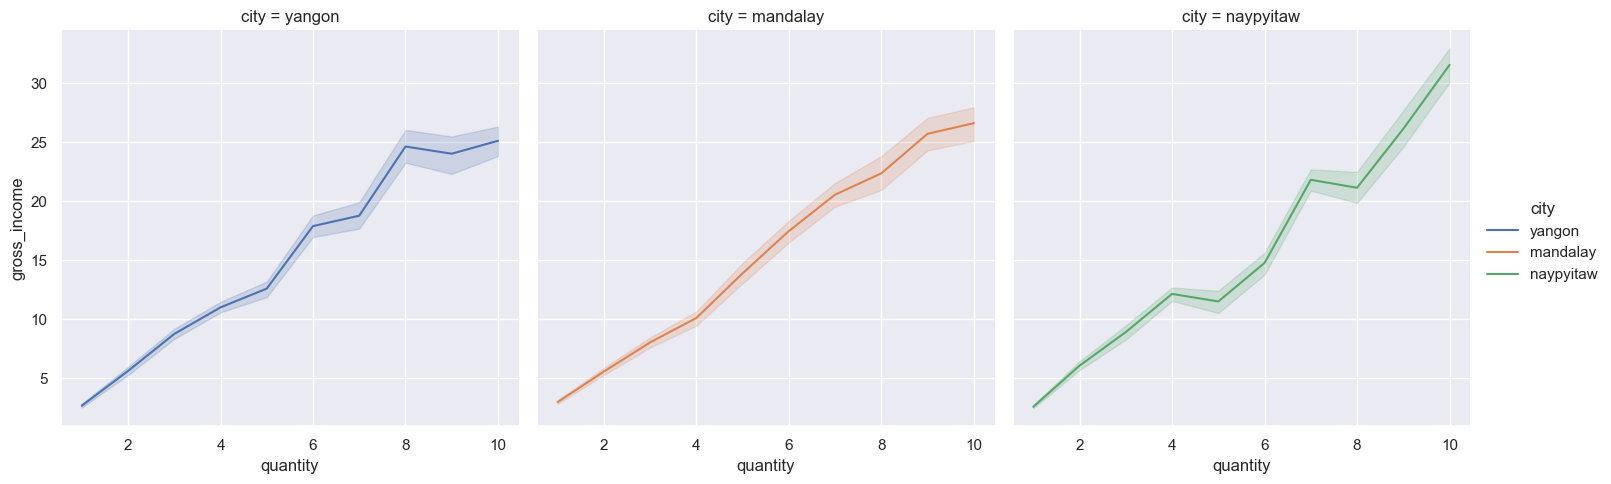

In [114]:
plt.figure(figsize=(12,6)) 
sns.relplot(data=df, x='quantity', y='gross_income',kind='line',hue='city',col='city',errorbar=('ci',50))

### Categorical Plots

### Distribution Plots

Histogram

<Axes: xlabel='unit_price', ylabel='Count'>

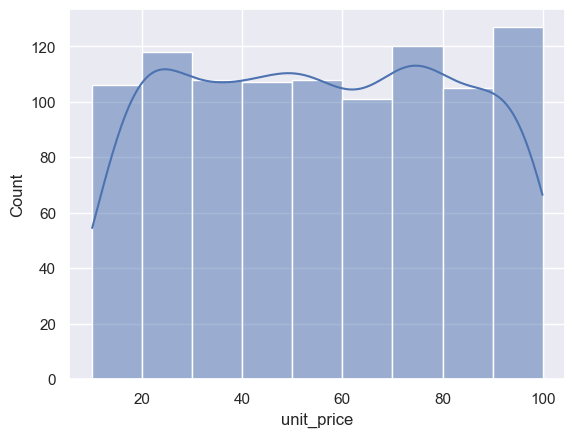

In [83]:
sns.histplot(data=df,x='unit_price',kde=True,binwidth=10,binrange=(10,100),stat='count',discrete=False)

<Axes: xlabel='unit_price', ylabel='Count'>

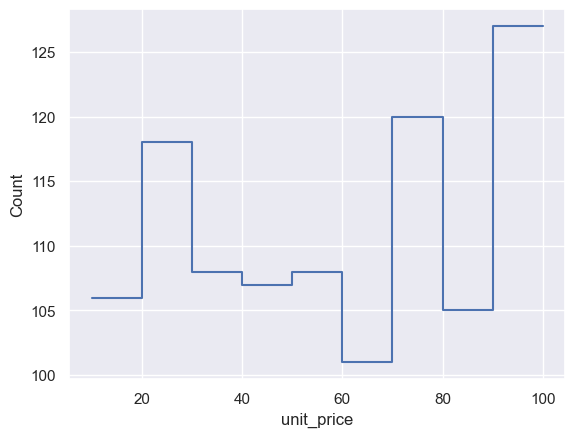

In [84]:
sns.histplot(data=df,x='unit_price',binwidth=10,binrange=(10,100),stat='count',discrete=False,element='step',fill=False)

<Axes: xlabel='unit_price', ylabel='Count'>

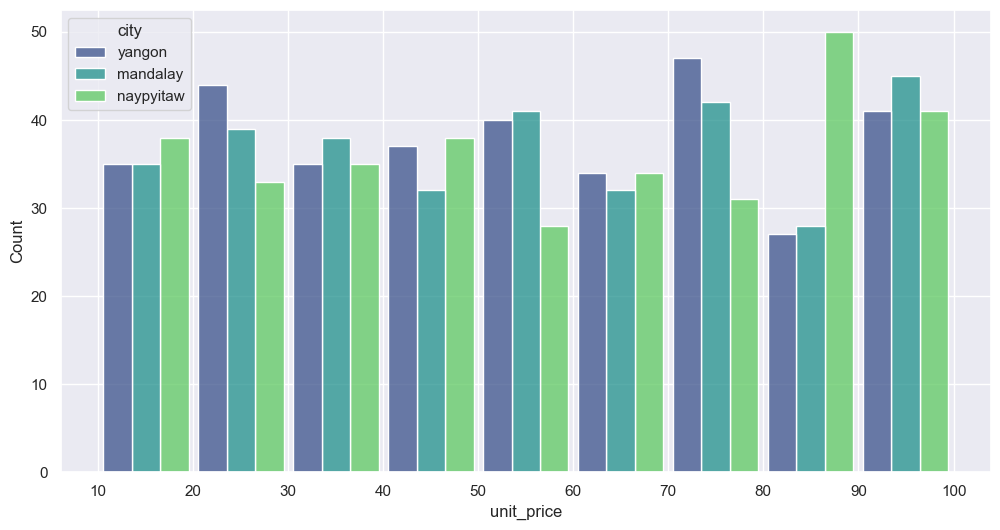

In [85]:
plt.figure(figsize=(12,6))
plt.xticks(range(10,101,10))
sns.histplot(data=df,x='unit_price',binwidth=10,hue='city',multiple='dodge',shrink=0.9,palette='viridis') 



<Axes: xlabel='gross_income', ylabel='rating'>

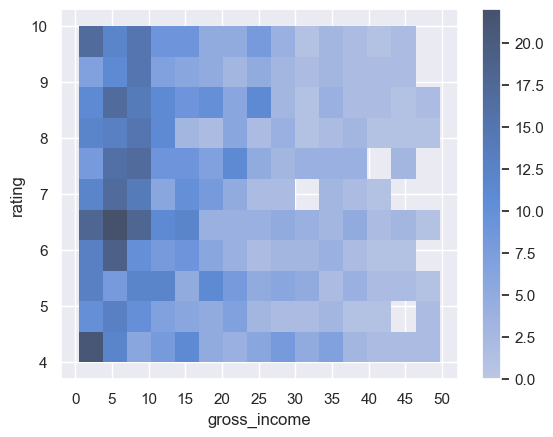

In [86]:
plt.xticks(range(0,101,5))
sns.histplot(data=df,x='gross_income',y='rating',cbar=True,stat='count') 

Kernal Density Estimation 

<Axes: xlabel='unit_price', ylabel='Density'>

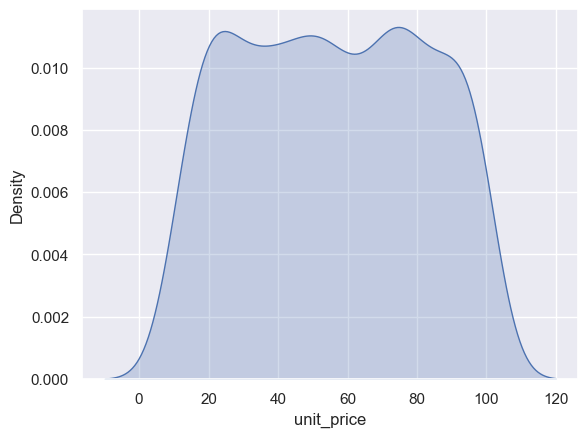

In [87]:
sns.kdeplot(df['unit_price'],fill=True)

Kernal Density Estimation (bivariate)

<Axes: xlabel='unit_price', ylabel='gross_income'>

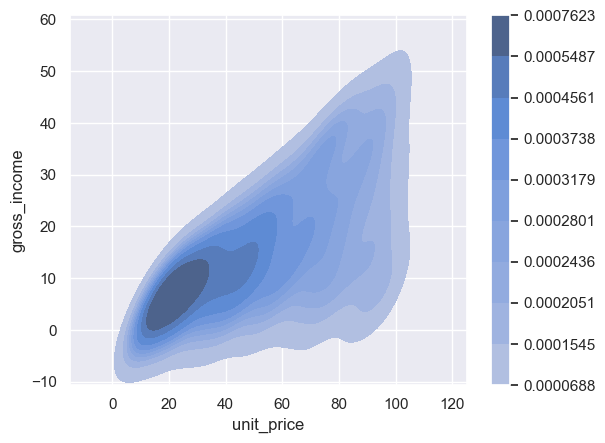

In [88]:
sns.kdeplot(data=df,x='unit_price', y='gross_income',fill=True,cbar=True)